In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

plt.style.use("bmh")
plt.rcParams['figure.dpi']  = 200
%matplotlib inline

## Load data / Train Test Split

In [29]:
housing = fetch_california_housing(as_frame=True).frame
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


/tmp/ipykernel_47711/4268838558.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax      = housing.hist(bins=50, ax=ax)


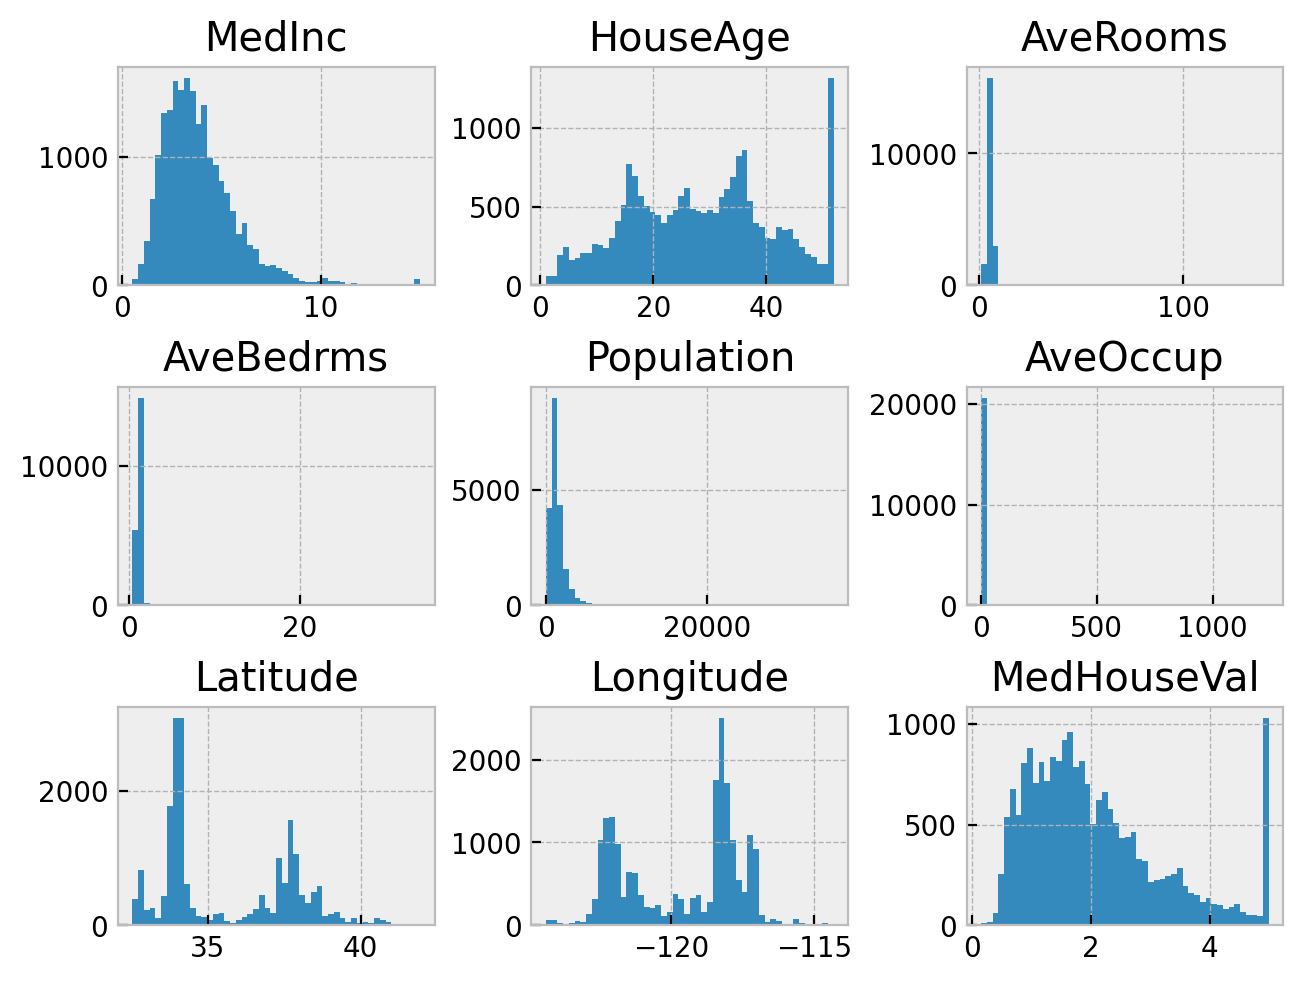

In [31]:
fig, ax = plt.subplots(layout='constrained')
ax      = housing.hist(bins=50, ax=ax)

In [32]:
housing["income_cat"]   = pd.cut(housing["MedInc"], bins=[0., 1.5, 3.0, 4.5, 6.,np.inf],
                                 labels=[1,2,3,4,5])
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,income_cat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,5
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,5
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,3
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,3
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414,3
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,2
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611,3


Text(0, 0.5, 'Number of districts')

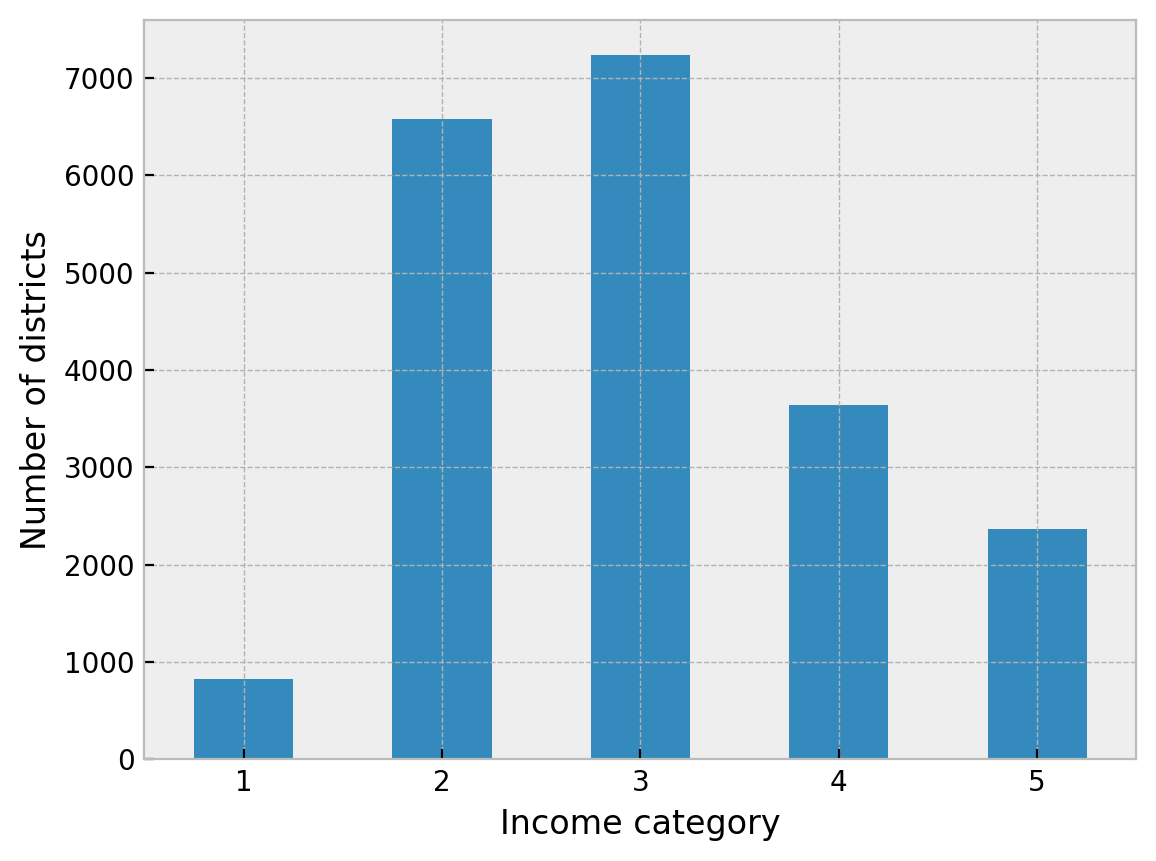

In [33]:
ax  = housing["income_cat"].value_counts().sort_index().plot.bar(rot=0)
ax.set_xlabel("Income category")
ax.set_ylabel("Number of districts")

In [34]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,
                                                   stratify=housing["income_cat"],
                                                   random_state=42)

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## First Look

In [35]:
housing = strat_train_set.copy()
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
12655,2.1736,29.0,5.485836,1.128895,2237.0,3.168555,38.52,-121.46,0.72100
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23,2.79600
2908,2.8750,44.0,5.393333,1.033333,667.0,2.223333,35.37,-119.04,0.82700
14053,2.2264,24.0,3.886128,1.074534,898.0,1.859213,32.75,-117.13,1.12500
20496,4.4964,27.0,6.096552,1.113793,1837.0,3.167241,34.28,-118.70,2.38300
1481,3.6964,28.0,4.789683,1.000000,724.0,2.873016,37.96,-122.04,1.65700
18125,7.4863,23.0,6.585023,1.046802,1782.0,2.780031,37.33,-122.03,4.12300
5830,5.0865,36.0,6.086331,0.946043,778.0,2.798561,34.20,-118.31,3.49600
17989,1.7171,17.0,5.155039,1.050388,408.0,1.581395,37.27,-121.95,1.81300
4861,0.4999,29.0,2.373272,1.055300,2690.0,12.396313,34.02,-118.28,5.00001


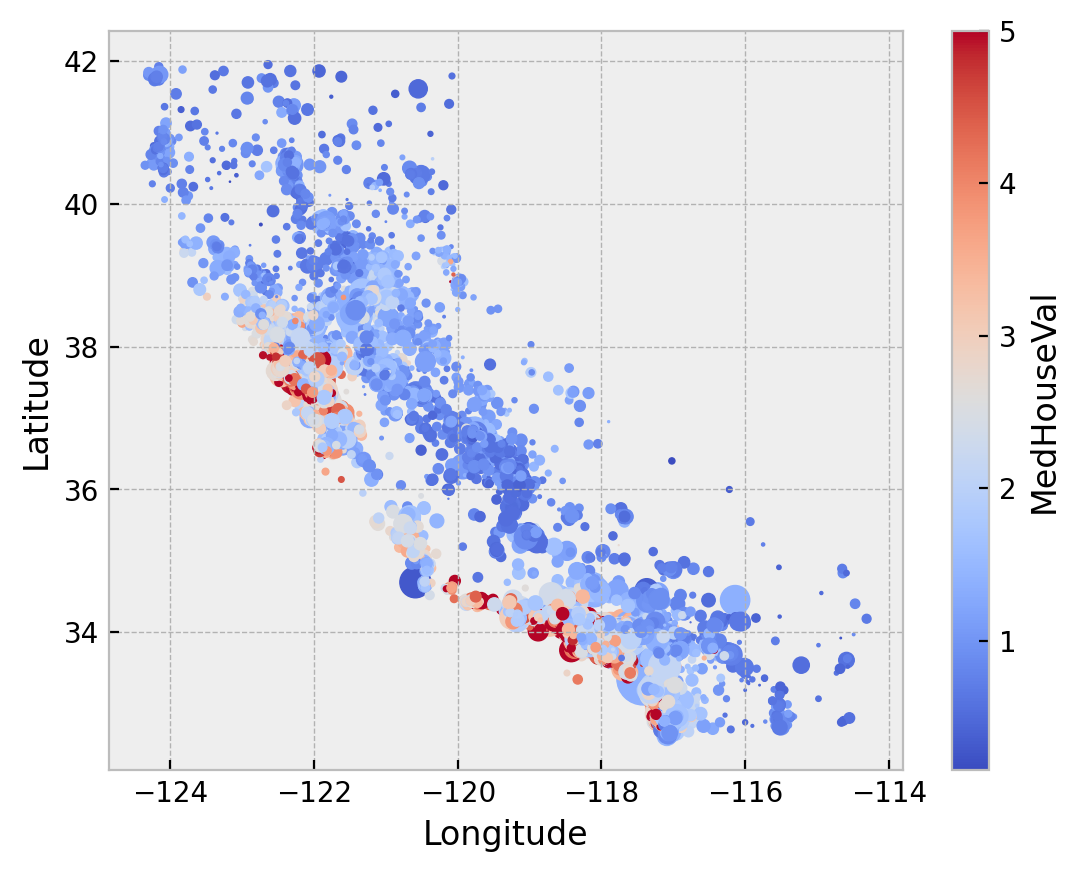

In [36]:
fig, ax = plt.subplots()
ax      = housing.plot(kind='scatter', x='Longitude', y='Latitude',
                       ax=ax, s=housing['Population']/100, c='MedHouseVal',
                       cmap='coolwarm', colorbar=True)

In [37]:
corr_matrix = housing.corr().round(2)
corr_matrix["MedHouseVal"].sort_values(ascending=False)

MedHouseVal    1.00
MedInc         0.69
AveRooms       0.15
HouseAge       0.11
AveOccup      -0.02
Population    -0.03
AveBedrms     -0.04
Longitude     -0.05
Latitude      -0.14
Name: MedHouseVal, dtype: float64

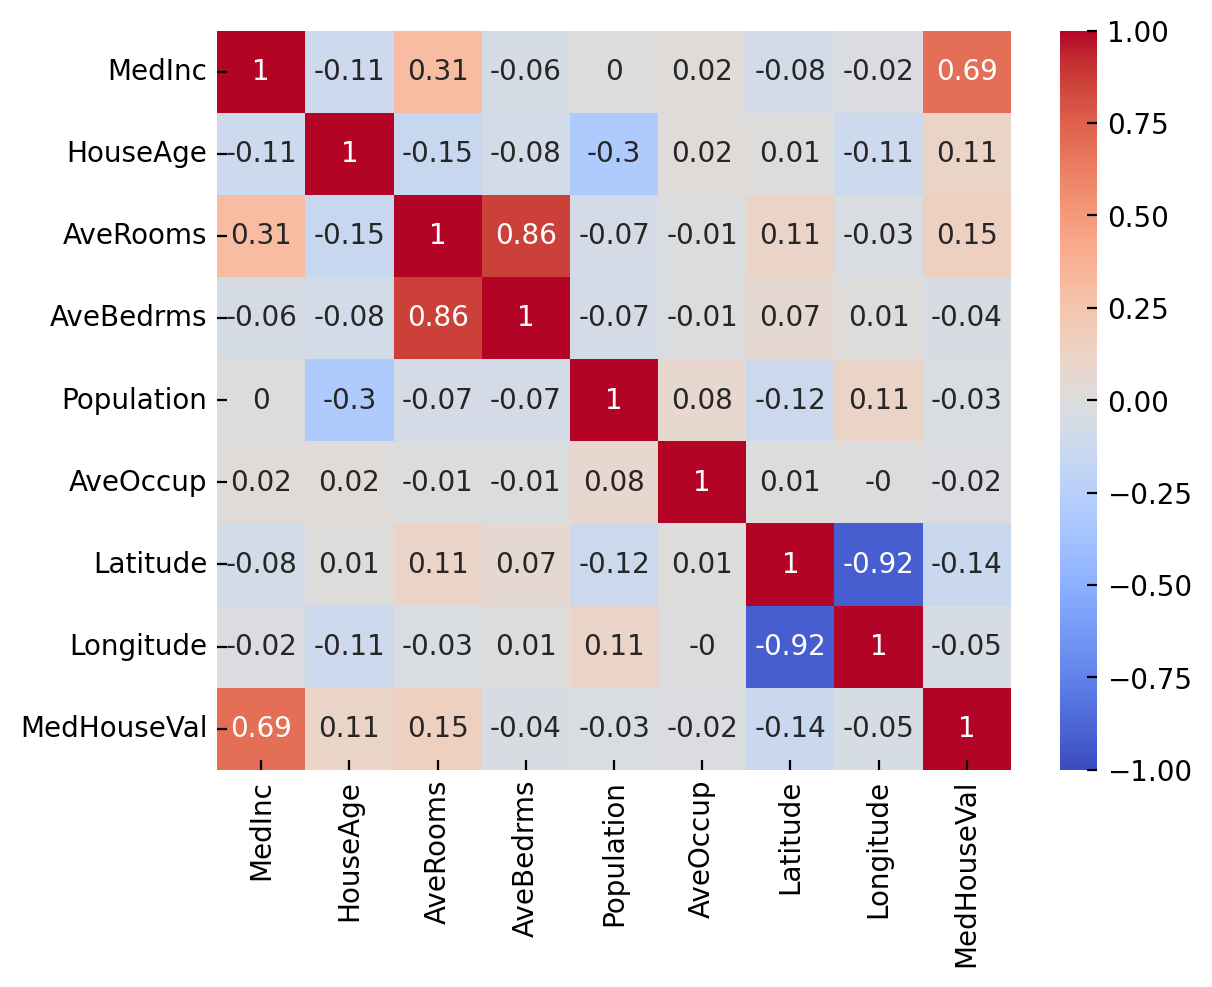

In [38]:
fig, ax = plt.subplots()
ax      = sns.heatmap(data=corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,
                      annot=True, ax=ax)

/tmp/ipykernel_47711/3646712078.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  ax      = scatter_matrix(housing[attributes], ax=ax)


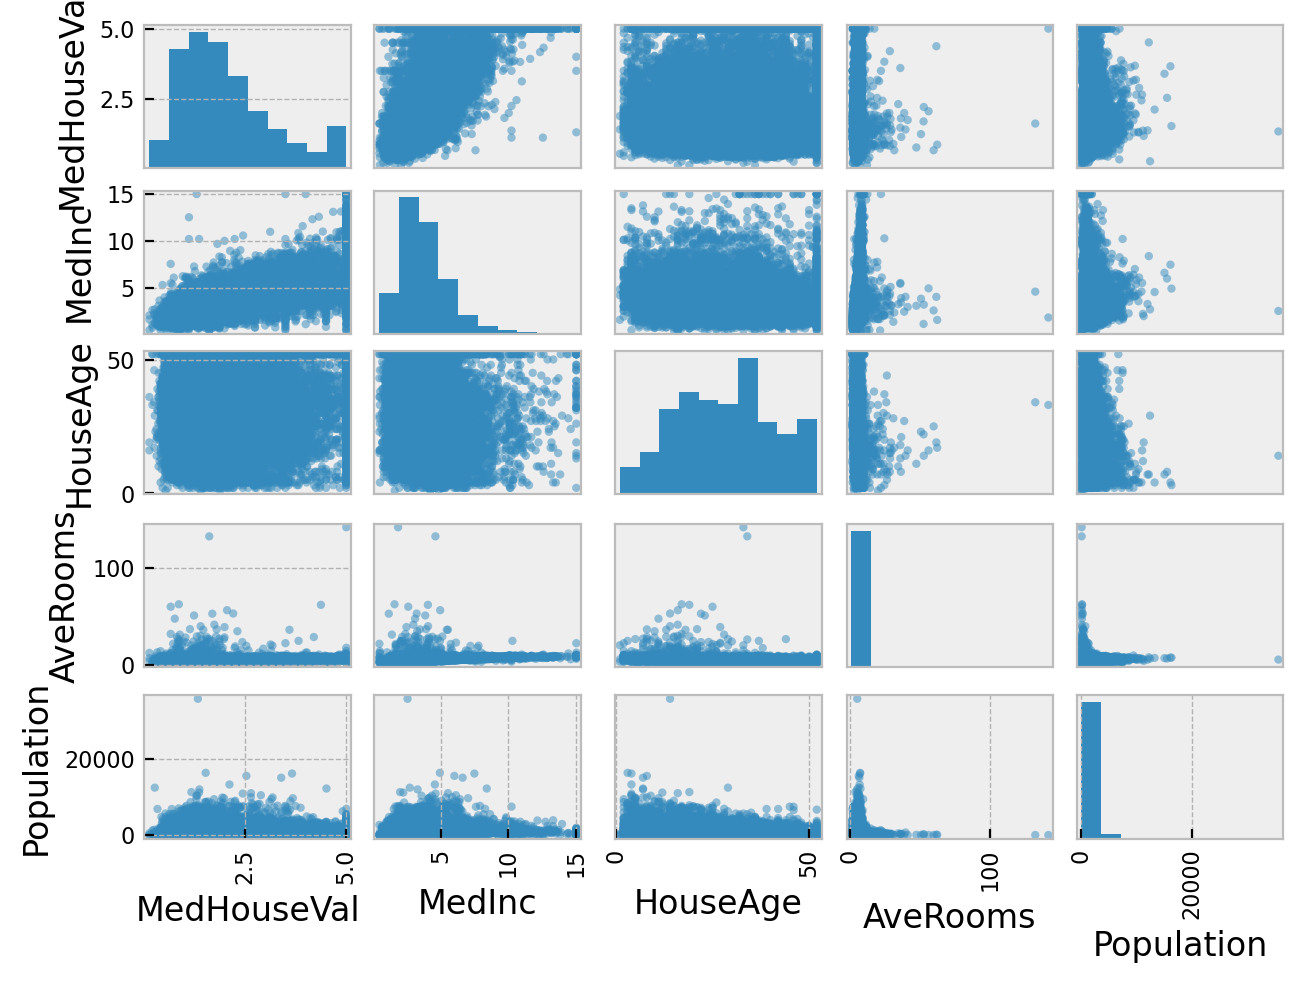

In [39]:
attributes  = ["MedHouseVal","MedInc","HouseAge","AveRooms","Population"]
fig, ax = plt.subplots(layout='constrained')
ax      = scatter_matrix(housing[attributes], ax=ax)

Text(0, 0.5, 'Median House Value')

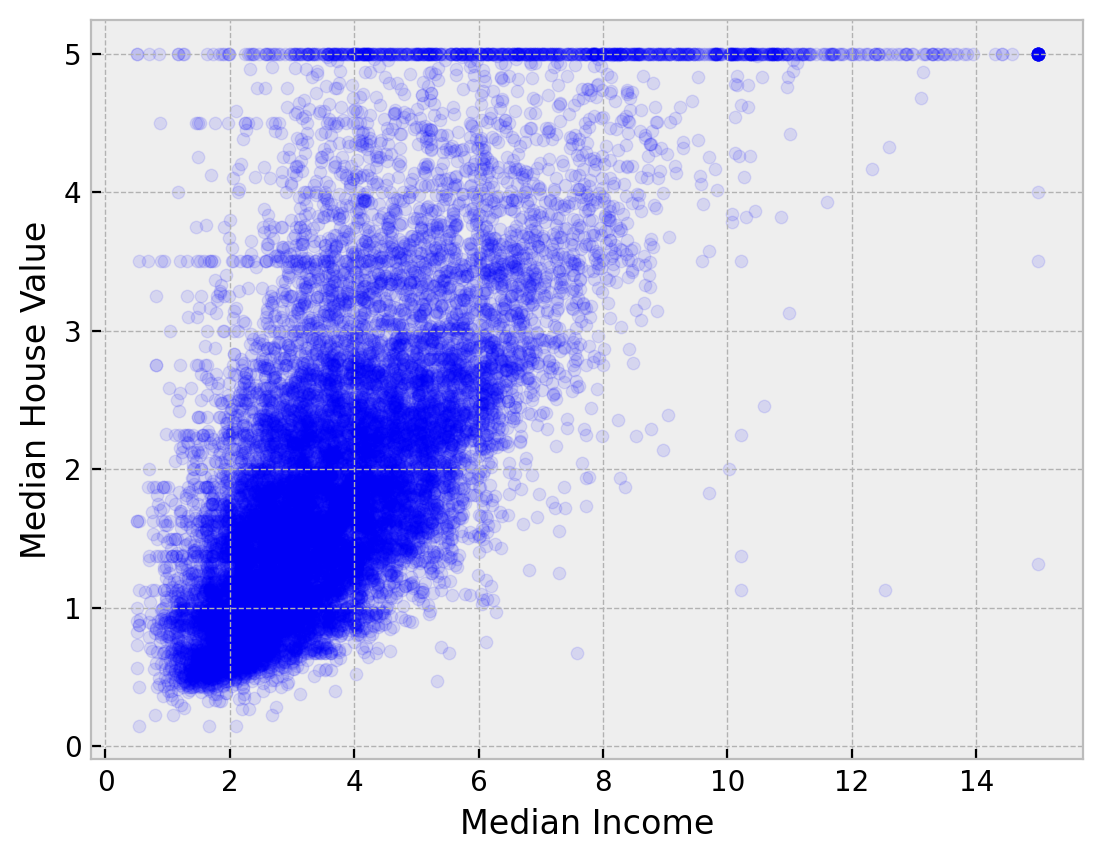

In [40]:
fig, ax = plt.subplots()
ax      = housing.plot(kind='scatter', x='MedInc', y='MedHouseVal',
                       ax=ax, alpha=0.1)
ax.set_xlabel("Median Income")
ax.set_ylabel("Median House Value")

## Prepare Data

In [41]:
housing         = strat_train_set.drop("MedHouseVal", axis=1)
housing_labels  = strat_train_set["MedHouseVal"].copy()

housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12655,2.1736,29.0,5.485836,1.128895,2237.0,3.168555,38.52,-121.46
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23
2908,2.8750,44.0,5.393333,1.033333,667.0,2.223333,35.37,-119.04
14053,2.2264,24.0,3.886128,1.074534,898.0,1.859213,32.75,-117.13
20496,4.4964,27.0,6.096552,1.113793,1837.0,3.167241,34.28,-118.70
1481,3.6964,28.0,4.789683,1.000000,724.0,2.873016,37.96,-122.04
18125,7.4863,23.0,6.585023,1.046802,1782.0,2.780031,37.33,-122.03
5830,5.0865,36.0,6.086331,0.946043,778.0,2.798561,34.20,-118.31
17989,1.7171,17.0,5.155039,1.050388,408.0,1.581395,37.27,-121.95
4861,0.4999,29.0,2.373272,1.055300,2690.0,12.396313,34.02,-118.28
